In [1]:
import torch
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd


# 1. LAMBDA LR

Sets the learning rate of each parameter group to the initial lr times a given function. When last_epoch=-1, sets initial lr as lr.

$$
l r_{\text {epoch}} = l r_{\text {initial}} * Lambda(epoch)
$$


Factor =  1.0  , Learning Rate =  100.0
Factor =  0.65  , Learning Rate =  65.0
Factor =  0.423  , Learning Rate =  42.25
Factor =  0.275  , Learning Rate =  27.463
Factor =  0.179  , Learning Rate =  17.851
Factor =  0.116  , Learning Rate =  11.603
Factor =  0.075  , Learning Rate =  7.542
Factor =  0.049  , Learning Rate =  4.902
Factor =  0.032  , Learning Rate =  3.186
Factor =  0.021  , Learning Rate =  2.071


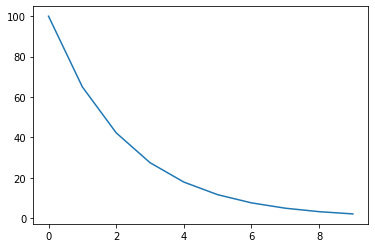

In [3]:

model = torch.nn.Linear(2, 1)
optimizer = torch.optim.SGD(model.parameters(), lr=100)
lambda1 = lambda epoch: 0.65 ** epoch
scheduler = torch.optim.lr_scheduler.LambdaLR(optimizer, lr_lambda=lambda1)


lrs = []

for i in range(10):
    optimizer.step()
    lrs.append(optimizer.param_groups[0]["lr"])
    print("Factor = ", round(0.65 ** i,3)," , Learning Rate = ",round(optimizer.param_groups[0]["lr"],3))
    scheduler.step()

plt.plot(range(10),lrs)

# 2. MultiplicativeLR

Multiply the learning rate of each parameter group by the factor given in the specified function. When last_epoch=-1, sets initial lr as lr.

$$
l r_{\text {epoch}} = l r_{\text {epoch - 1}} * Lambda(epoch)
$$

Factor =  0.95  , Learning Rate =  100
Factor =  0.95  , Learning Rate =  65.0
Factor =  0.95  , Learning Rate =  27.462500000000002
Factor =  0.95  , Learning Rate =  7.541889062500001
Factor =  0.95  , Learning Rate =  1.3462743344628911
Factor =  0.95  , Learning Rate =  0.1562069488955407
Factor =  0.95  , Learning Rate =  0.011780954793617751
Factor =  0.95  , Learning Rate =  0.0005775292516746525
Factor =  0.95  , Learning Rate =  1.8402670033873238e-05
Factor =  0.95  , Learning Rate =  3.811544977260443e-07


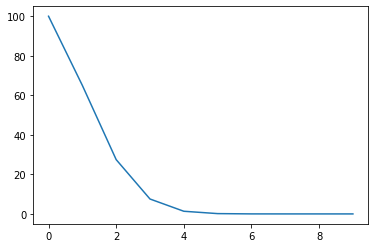

In [4]:
model = torch.nn.Linear(2, 1)
optimizer = torch.optim.SGD(model.parameters(), lr=100)
lmbda = lambda epoch: 0.65 ** epoch
scheduler = torch.optim.lr_scheduler.MultiplicativeLR(optimizer, lr_lambda=lmbda)
lrs = []

for i in range(10):
    optimizer.step()
    lrs.append(optimizer.param_groups[0]["lr"])
    print("Factor = ",0.95," , Learning Rate = ",optimizer.param_groups[0]["lr"])
    scheduler.step()

plt.plot(range(10),lrs)

# 3. StepLR

Decays the learning rate of each parameter group by gamma every step_size epochs. Notice that such decay can happen simultaneously with other changes to the learning rate from outside this scheduler. When last_epoch=-1, sets initial lr as lr.

$$
l r_{\text {epoch}}=\left\{\begin{array}{ll}
Gamma * l r_{\text {epoch - 1}}, & \text { if } {\text {epoch % step_size}}=0 \\
l r_{\text {epoch - 1}}, & \text { otherwise }
\end{array}\right.
$$

Factor =  1  , Learning Rate =  100
Factor =  0.1  , Learning Rate =  100
Factor =  1  , Learning Rate =  10.0
Factor =  0.1  , Learning Rate =  10.0
Factor =  1  , Learning Rate =  1.0
Factor =  0.1  , Learning Rate =  1.0
Factor =  1  , Learning Rate =  0.1
Factor =  0.1  , Learning Rate =  0.1
Factor =  1  , Learning Rate =  0.010000000000000002
Factor =  0.1  , Learning Rate =  0.010000000000000002


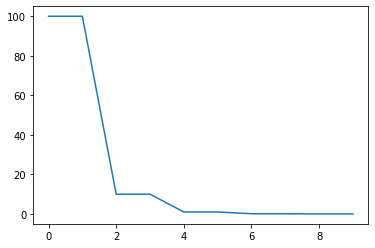

In [5]:
model = torch.nn.Linear(2, 1)
optimizer = torch.optim.SGD(model.parameters(), lr=100)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=2, gamma=0.1)
lrs = []

for i in range(10):
    optimizer.step()
    lrs.append(optimizer.param_groups[0]["lr"])
    print("Factor = ",0.1 if i!=0 and i%2!=0 else 1," , Learning Rate = ",optimizer.param_groups[0]["lr"])
    scheduler.step()

plt.plot(range(10),lrs)

# 4. MultiStepLR

Decays the learning rate of each parameter group by gamma once the number of epoch reaches one of the milestones. Notice that such decay can happen simultaneously with other changes to the learning rate from outside this scheduler. When last_epoch=-1, sets initial lr as lr.

$$
l r_{\text {epoch}}=\left\{\begin{array}{ll}
Gamma * l r_{\text {epoch - 1}}, & \text { if } {\text{ epoch in [milestones]}} \\
l r_{\text {epoch - 1}}, & \text { otherwise }
\end{array}\right.
$$

Factor =  1  , Learning Rate =  100
Factor =  1  , Learning Rate =  100
Factor =  1  , Learning Rate =  100
Factor =  1  , Learning Rate =  100
Factor =  1  , Learning Rate =  100
Factor =  1  , Learning Rate =  100
Factor =  0.1  , Learning Rate =  10.0
Factor =  1  , Learning Rate =  10.0
Factor =  0.1  , Learning Rate =  1.0
Factor =  0.1  , Learning Rate =  0.1


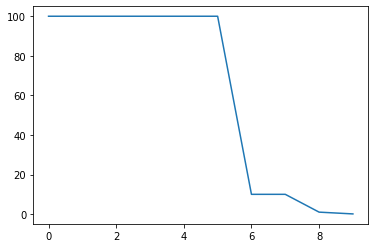

In [6]:

model = torch.nn.Linear(2, 1)
optimizer = torch.optim.SGD(model.parameters(), lr=100)
scheduler = torch.optim.lr_scheduler.MultiStepLR(optimizer, milestones=[6,8,9], gamma=0.1)
lrs = []

for i in range(10):
    optimizer.step()
    lrs.append(optimizer.param_groups[0]["lr"])
    print("Factor = ",0.1 if i in [6,8,9] else 1," , Learning Rate = ",optimizer.param_groups[0]["lr"])
    scheduler.step()

plt.plot(range(10),lrs)

# 5. ExponentialLR

Decays the learning rate of each parameter group by gamma every epoch. When last_epoch=-1, sets initial lr as lr.

$$
l r_{\text {epoch}}= Gamma * l r_{\text {epoch - 1}}
$$


Factor =  0.1  , Learning Rate =  100
Factor =  0.1  , Learning Rate =  10.0
Factor =  0.1  , Learning Rate =  1.0
Factor =  0.1  , Learning Rate =  0.1
Factor =  0.1  , Learning Rate =  0.010000000000000002
Factor =  0.1  , Learning Rate =  0.0010000000000000002
Factor =  0.1  , Learning Rate =  0.00010000000000000003
Factor =  0.1  , Learning Rate =  1.0000000000000004e-05
Factor =  0.1  , Learning Rate =  1.0000000000000004e-06
Factor =  0.1  , Learning Rate =  1.0000000000000005e-07


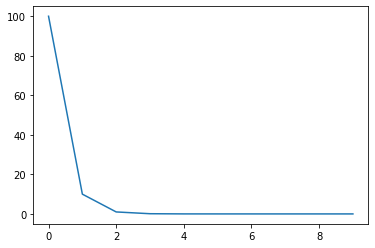

In [7]:

model = torch.nn.Linear(2, 1)
optimizer = torch.optim.SGD(model.parameters(), lr=100)
scheduler = torch.optim.lr_scheduler.ExponentialLR(optimizer, gamma=0.1)
lrs = []


for i in range(10):
    optimizer.step()
    lrs.append(optimizer.param_groups[0]["lr"])
    print("Factor = ",0.1," , Learning Rate = ",optimizer.param_groups[0]["lr"])
    scheduler.step()

plt.plot(lrs)


# 6. CosineAnnealingLR

Set the learning rate of each parameter group using a cosine annealing schedule.
When last_epoch=-1, sets initial lr as lr. Notice that because the schedule is defined recursively, the learning rate can be simultaneously modified outside this scheduler by other operators. If the learning rate is set solely by this scheduler, the learning rate at each step becomes:

$$
\eta_{t}=\eta_{\min }+\frac{1}{2}\left(\eta_{\max }-\eta_{\min }\right)\left(1+\cos \left(\frac{T_{c u r}}{T_{\max }} \pi\right)\right)
$$

It has been proposed in SGDR: Stochastic Gradient Descent with Warm Restarts. Note that this only implements the cosine annealing part of SGDR, and not the restarts.https://arxiv.org/abs/1608.03983

Factor =  0  , Learning Rate =  100
Factor =  1  , Learning Rate =  97.55282581475768
Factor =  2  , Learning Rate =  90.45084971874736
Factor =  3  , Learning Rate =  79.38926261462365
Factor =  4  , Learning Rate =  65.45084971874736
Factor =  5  , Learning Rate =  49.99999999999999
Factor =  6  , Learning Rate =  34.54915028125263
Factor =  7  , Learning Rate =  20.610737385376346
Factor =  8  , Learning Rate =  9.549150281252633
Factor =  9  , Learning Rate =  2.447174185242323
Factor =  10  , Learning Rate =  0.0
Factor =  11  , Learning Rate =  2.447174185242323
Factor =  12  , Learning Rate =  9.54915028125267
Factor =  13  , Learning Rate =  20.610737385376428
Factor =  14  , Learning Rate =  34.54915028125278
Factor =  15  , Learning Rate =  50.00000000000021
Factor =  16  , Learning Rate =  65.45084971874765
Factor =  17  , Learning Rate =  79.38926261462399
Factor =  18  , Learning Rate =  90.45084971874776
Factor =  19  , Learning Rate =  97.5528258147581
Factor =  20  , Le

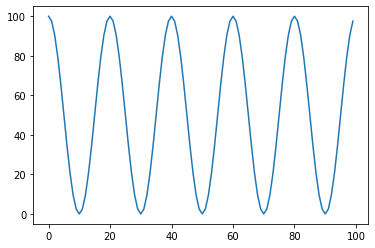

In [8]:

model = torch.nn.Linear(2, 1)
optimizer = torch.optim.SGD(model.parameters(), lr=100)
scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=10, eta_min=0)
lrs = []


for i in range(100):
    optimizer.step()
    lrs.append(optimizer.param_groups[0]["lr"])
    print("Factor = ",i," , Learning Rate = ",optimizer.param_groups[0]["lr"])
    scheduler.step()

plt.plot(lrs)


# 7. CyclicLR - triangular



Factor =  0  , Learning Rate =  0.001
Factor =  1  , Learning Rate =  0.02080000000000002
Factor =  2  , Learning Rate =  0.0406
Factor =  3  , Learning Rate =  0.06040000000000001
Factor =  4  , Learning Rate =  0.0802
Factor =  5  , Learning Rate =  0.1
Factor =  6  , Learning Rate =  0.0802
Factor =  7  , Learning Rate =  0.06040000000000001
Factor =  8  , Learning Rate =  0.0406
Factor =  9  , Learning Rate =  0.02080000000000002
Factor =  10  , Learning Rate =  0.001
Factor =  11  , Learning Rate =  0.02080000000000002
Factor =  12  , Learning Rate =  0.04060000000000004
Factor =  13  , Learning Rate =  0.06039999999999997
Factor =  14  , Learning Rate =  0.0802
Factor =  15  , Learning Rate =  0.1
Factor =  16  , Learning Rate =  0.0802
Factor =  17  , Learning Rate =  0.06039999999999997
Factor =  18  , Learning Rate =  0.04060000000000004
Factor =  19  , Learning Rate =  0.02080000000000002
Factor =  20  , Learning Rate =  0.001
Factor =  21  , Learning Rate =  0.02080000000000

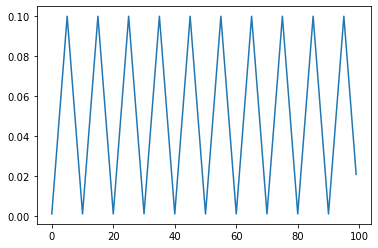

In [9]:

model = torch.nn.Linear(2, 1)
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)
scheduler = torch.optim.lr_scheduler.CyclicLR(optimizer, base_lr=0.001, max_lr=0.1,step_size_up=5,mode="triangular")
lrs = []


for i in range(100):
    optimizer.step()
    lrs.append(optimizer.param_groups[0]["lr"])
    print("Factor = ",i," , Learning Rate = ",optimizer.param_groups[0]["lr"])
    scheduler.step()

plt.plot(lrs)


# 7. CyclicLR - triangular2


Factor =  0  , Learning Rate =  0.001
Factor =  1  , Learning Rate =  0.02080000000000002
Factor =  2  , Learning Rate =  0.0406
Factor =  3  , Learning Rate =  0.06040000000000001
Factor =  4  , Learning Rate =  0.0802
Factor =  5  , Learning Rate =  0.1
Factor =  6  , Learning Rate =  0.0802
Factor =  7  , Learning Rate =  0.06040000000000001
Factor =  8  , Learning Rate =  0.0406
Factor =  9  , Learning Rate =  0.02080000000000002
Factor =  10  , Learning Rate =  0.001
Factor =  11  , Learning Rate =  0.01090000000000001
Factor =  12  , Learning Rate =  0.02080000000000002
Factor =  13  , Learning Rate =  0.030699999999999984
Factor =  14  , Learning Rate =  0.0406
Factor =  15  , Learning Rate =  0.0505
Factor =  16  , Learning Rate =  0.0406
Factor =  17  , Learning Rate =  0.030699999999999984
Factor =  18  , Learning Rate =  0.02080000000000002
Factor =  19  , Learning Rate =  0.01090000000000001
Factor =  20  , Learning Rate =  0.001
Factor =  21  , Learning Rate =  0.005950000

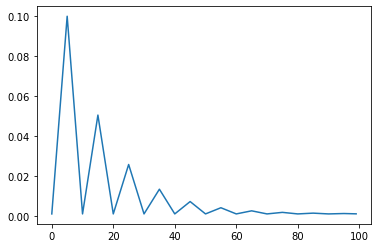

In [10]:

model = torch.nn.Linear(2, 1)
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)
scheduler = torch.optim.lr_scheduler.CyclicLR(optimizer, base_lr=0.001, max_lr=0.1,step_size_up=5,mode="triangular2")
lrs = []


for i in range(100):
    optimizer.step()
    lrs.append(optimizer.param_groups[0]["lr"])
    print("Factor = ",i," , Learning Rate = ",optimizer.param_groups[0]["lr"])
    scheduler.step()

plt.plot(lrs)


# 7. CyclicLR - exp_range


Factor =  0  , Learning Rate =  0.001
Factor =  1  , Learning Rate =  0.017830000000000016
Factor =  2  , Learning Rate =  0.029610999999999995
Factor =  3  , Learning Rate =  0.037479025
Factor =  4  , Learning Rate =  0.04234289499999999
Factor =  5  , Learning Rate =  0.0449268259375
Factor =  6  , Learning Rate =  0.030870241637499993
Factor =  7  , Learning Rate =  0.02004227904390625
Factor =  8  , Learning Rate =  0.011790624791546873
Factor =  9  , Learning Rate =  0.005586015536407425
Factor =  10  , Learning Rate =  0.001
Factor =  11  , Learning Rate =  0.004313396225054365
Factor =  12  , Learning Rate =  0.006632773582592419
Factor =  13  , Learning Rate =  0.008181786317805324
Factor =  14  , Learning Rate =  0.009139357826846037
Factor =  15  , Learning Rate =  0.009648067691023915
Factor =  16  , Learning Rate =  0.006880686029896261
Factor =  17  , Learning Rate =  0.004748937344058865
Factor =  18  , Learning Rate =  0.0031243978283000268
Factor =  19  , Learning Rate

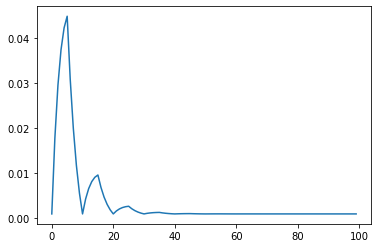

In [11]:

model = torch.nn.Linear(2, 1)
optimizer = torch.optim.SGD(model.parameters(), lr=100)
scheduler = torch.optim.lr_scheduler.CyclicLR(optimizer, base_lr=0.001, max_lr=0.1,step_size_up=5,mode="exp_range",gamma=0.85)
lrs = []


for i in range(100):
    optimizer.step()
    lrs.append(optimizer.param_groups[0]["lr"])
    print("Factor = ",i," , Learning Rate = ",optimizer.param_groups[0]["lr"])
    scheduler.step()

plt.plot(lrs)


# 8.OneCycleLR - cos

Sets the learning rate of each parameter group according to the 1cycle learning rate policy. The 1cycle policy anneals the learning rate from an initial learning rate to some maximum learning rate and then from that maximum learning rate to some minimum learning rate much lower than the initial learning rate. This policy was initially described in the paper Super-Convergence: Very Fast Training of Neural Networks Using Large Learning Rates.

The 1cycle learning rate policy changes the learning rate after every batch. step should be called after a batch has been used for training.

This scheduler is not chainable.

Factor =  0  , Learning Rate =  0.0040000000000000036
Factor =  1  , Learning Rate =  0.004281378056590748
Factor =  2  , Learning Rate =  0.00512221332591585
Factor =  3  , Learning Rate =  0.006512647783225481
Factor =  4  , Learning Rate =  0.008436379855794068
Factor =  5  , Learning Rate =  0.010870855543955726
Factor =  6  , Learning Rate =  0.013787532846129102
Factor =  7  , Learning Rate =  0.017152216387689725
Factor =  8  , Learning Rate =  0.02092545833047227
Factor =  9  , Learning Rate =  0.02506302086260566
Factor =  10  , Learning Rate =  0.029516394846410082
Factor =  11  , Learning Rate =  0.03423336854368411
Factor =  12  , Learning Rate =  0.03915863975059739
Factor =  13  , Learning Rate =  0.04423446416546729
Factor =  14  , Learning Rate =  0.04940133238789996
Factor =  15  , Learning Rate =  0.05459866761210004
Factor =  16  , Learning Rate =  0.05976553583453271
Factor =  17  , Learning Rate =  0.0648413602494026
Factor =  18  , Learning Rate =  0.0697666314563

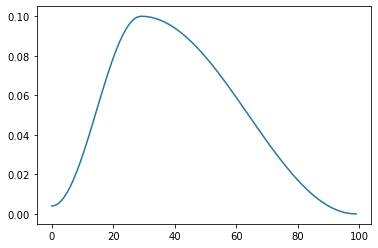

In [12]:

model = torch.nn.Linear(2, 1)
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)
scheduler = torch.optim.lr_scheduler.OneCycleLR(optimizer, max_lr=0.1, steps_per_epoch=10, epochs=10)
lrs = []


for i in range(100):
    optimizer.step()
    lrs.append(optimizer.param_groups[0]["lr"])
    print("Factor = ",i," , Learning Rate = ",optimizer.param_groups[0]["lr"])
    scheduler.step()

plt.plot(lrs)


# 8.OneCycleLR - linear

Factor =  0  , Learning Rate =  0.004
Factor =  1  , Learning Rate =  0.007310344827586207
Factor =  2  , Learning Rate =  0.010620689655172414
Factor =  3  , Learning Rate =  0.013931034482758621
Factor =  4  , Learning Rate =  0.017241379310344827
Factor =  5  , Learning Rate =  0.020551724137931035
Factor =  6  , Learning Rate =  0.023862068965517243
Factor =  7  , Learning Rate =  0.02717241379310345
Factor =  8  , Learning Rate =  0.030482758620689655
Factor =  9  , Learning Rate =  0.033793103448275866
Factor =  10  , Learning Rate =  0.037103448275862067
Factor =  11  , Learning Rate =  0.04041379310344828
Factor =  12  , Learning Rate =  0.04372413793103448
Factor =  13  , Learning Rate =  0.047034482758620696
Factor =  14  , Learning Rate =  0.0503448275862069
Factor =  15  , Learning Rate =  0.05365517241379311
Factor =  16  , Learning Rate =  0.05696551724137931
Factor =  17  , Learning Rate =  0.06027586206896551
Factor =  18  , Learning Rate =  0.06358620689655173
Factor =

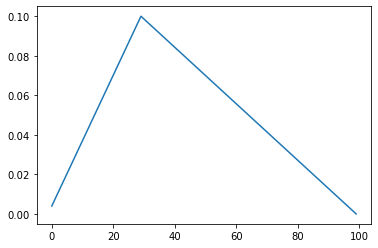

In [13]:

model = torch.nn.Linear(2, 1)
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)
scheduler = torch.optim.lr_scheduler.OneCycleLR(optimizer, max_lr=0.1, steps_per_epoch=10, epochs=10,anneal_strategy='linear')
lrs = []


for i in range(100):
    optimizer.step()
    lrs.append(optimizer.param_groups[0]["lr"])
    print("Factor = ",i," , Learning Rate = ",optimizer.param_groups[0]["lr"])
    scheduler.step()

plt.plot(lrs)


# 9.CosineAnnealingWarmRestarts
Set the learning rate of each parameter group using a cosine annealing schedule, and restarts after Ti epochs.


$$
\eta_{t}=\eta_{\min }+\frac{1}{2}\left(\eta_{\max }-\eta_{\min }\right)\left(1+\cos \left(\frac{T_{\operatorname{cur}}}{T_{i}} \pi\right)\right)
$$


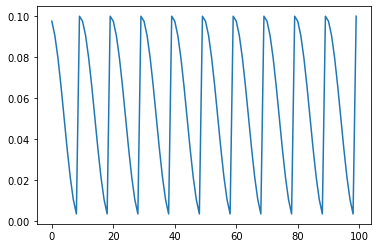

In [14]:
import torch
import matplotlib.pyplot as plt

model = torch.nn.Linear(2, 1)
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)
lr_sched = torch.optim.lr_scheduler.CosineAnnealingWarmRestarts(optimizer, T_0=10, T_mult=1, eta_min=0.001, last_epoch=-1)


lrs = []

for i in range(100):
    lr_sched.step()
    lrs.append(
        optimizer.param_groups[0]["lr"]
    )

plt.plot(lrs)

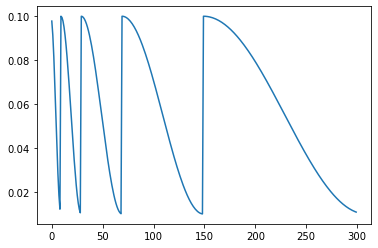

In [15]:
import torch
import matplotlib.pyplot as plt

model = torch.nn.Linear(2, 1)
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)
lr_sched = torch.optim.lr_scheduler.CosineAnnealingWarmRestarts(optimizer, T_0=10, T_mult=2, eta_min=0.01, last_epoch=-1)


lrs = []

for i in range(300):
    lr_sched.step()
    lrs.append(
        optimizer.param_groups[0]["lr"]
    )

plt.plot(lrs)